## Performing PCA in NumPy

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def loadDataSet(fileName, delim='\t'):
    with open(fileName) as fr:
        stringArr = [line.strip().split(delim) for line in fr.readlines()]
        datArr = [list(map(float, line)) for line in stringArr]
        return np.mat(datArr)

In [3]:
def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # sort top N smallest to largest
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0],marker='^', s=90)
    ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0],marker='o', s=50, c='red')
    plt.show()
    
    return lowDDataMat, reconMat

In [4]:
dataMat = loadDataSet('testSet.txt')
dataMat[:5,:]

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        [ 9.306371,  9.847394],
        [ 8.330131,  8.340352]])

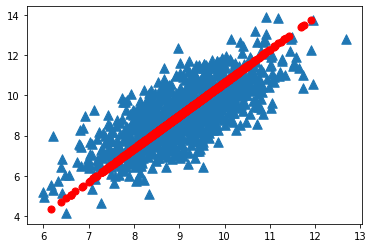

In [5]:
lowDMat, reconMat = pca(dataMat, 1)

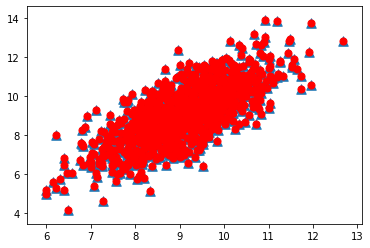

In [6]:
lowDMat, reconMat = pca(dataMat, 2)

## Example: using PCA to reduce the dimensionality of semiconductor manufacturing data

In [7]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0],i])
                                                                     
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0],i] = meanVal
                                                          
    return datMat

In [8]:
dataMat = replaceNanWithMean()
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals 
covMat = np.cov(meanRemoved, rowvar=0)
eigVals,eigVects = np.linalg.eig(np.mat(covMat))
eigVals[:5]

array([53415197.85687523, 21746671.90465921,  8248376.61529074,
        2073880.85929397,  1315404.38775829])

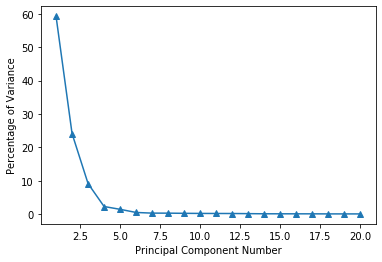

In [9]:
eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]#reverse
sortedEigVals = eigVals[eigValInd]
total = np.sum(sortedEigVals)
varPercentage = sortedEigVals/total*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()